![Lille](img/lille.jpeg)

# Avant-propos
___

Ce notebook utilise un petit jeu de données fictif, inspiré du marché immobilier lillois. Il a été créé pour apprendre pas à pas comment fonctionne la régression linéaire.

L’idée est de prédire le prix d’un logement en fonction d'une information simple, sa surface. C’est un exemple facile à comprendre, parfait pour s’initier à la modélisation.

# Introduction
___

Nous allons découvrir comment le machine learning peut être utilisé pour **prédire une valeur numérique** à partir de données d’entrée. C’est ce qu’on appelle un problème de **régression**.

Nous allons nous intéresser à un cas simple mais très concret :  

`Prédire le prix d’un bien immobilier en fonction de sa surface.`

Ce type de question est au cœur de nombreux usages du ML :
- prédire un salaire selon l’expérience,
- estimer la consommation d’énergie selon la taille d’un logement,
- estimer la valeur d’un véhicule selon son kilométrage…

Notre objectif n’est pas seulement d’obtenir une prédiction correcte, mais surtout de comprendre et expérimenter les étapes fondamentales d’un projet de **machine learning supervisé**.

💡 Le machine learning (ML) n'est pas uniquement choisir un modèle, lui donner des données, et obtenir des prédictions.
En réalité, un projet ML suit un processus rigoureux, avec plusieurs étapes interdépendantes. Ce processus n’est pas figé, mais il suit une logique que l’on retrouve dans tous les projets, quel que soit le type de données ou de modèle.

Ce notebook présente un **pipeline** (démarche structurée), composée de plusieurs **étapes clés**, que l’on retrouve dans la majorité des projets de **machine learning supervisé**.

| Étapes                        | Description                                                                                               |
|-------------------------------| ----------------------------------------------------------------------------------------------------------|
| 1 - Data Loading              | Chargement des données (CSV, base de données, API, etc.)                                                  |
| 2 - Exploration               | Analyse des données : types, statistiques, corrélations, visualisations                                   |
| 3 - Data preparation          | Suppression des doublons, traitement des valeurs manquantes, création de features (sur tout le dataset)   |
| 4 - Train/Test Split          | Séparation des données pour évaluation (généralement 80/20 ou 70/30)                                      |
| 5 - Preprocessing             | Encodage, standardisation, etc. (fit sur le train, puis transform sur le test)                            |
| 6 - Model Training            | Entraînement du modèle sur les données d’entraînement                                                     |
| 7 - Evaluation                | Mesure des performances : MAE, MSE, R², accuracy, confusion matrix, etc..                                 |

# Import des bibliothèques
___

On commence par importer toutes les bibliothèques dont nous allons avoir besoin dans ce projet.

- **Pandas** : pour charger les données, les explorer et les modifier
- **NumPy** : pour effectuer des calculs numériques, notamment sur les tableaux
- **Matplotlib.pyplot** : pour créer des visualisations (nuages de points, courbes, histogrammes...)
- **Scikit-learn (sklearn)** :
  - `LinearRegression` : pour entraîner un modèle de régression linéaire
  - `train_test_split` : pour séparer les données en jeu d'entraînement et de test
  - `mean_squared_error`, `r2_score` : pour évaluer la performance du modèle
  - `StandardScaler` : pour standardiser les données si nécessaire
- **Joblib** : pour sauvegarder ou recharger un modèle déjà entraîné

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 1. 📚 Data loading
___

La première étape de tout projet de machine learning consiste à charger les données dans l’environnement de travail. Dans ce notebook, nous utilisons un fichier au format CSV. Pour cela, nous utilisons la fonction read_csv() fournie par la bibliothèque Pandas, qui permet de lire le fichier et de le transformer en **DataFrame**.

💡 Les données peuvent provenir de nombreuses sources différentes : des fichiers **Excel** (.xlsx), des fichiers **JSON** (.json), des formats optimisés comme **Parquet** (.parquet), ou encore directement de **BDD** ou d’**API**.

In [2]:
df = pd.read_csv("data/lille_immobilier.csv")

# 2. 🔍 Exploration
___

### 2.1 Inspection rapide du dataset

Une fois les données chargées, il est important de commencer par en examiner un **aperçu rapide** pour s’assurer que le fichier a bien été lu, que les colonnes sont correctement nommées et que les premières lignes ont du sens.

In [3]:
df.head()

,surface_m2,prix_euros
0,57.5,180300
1,115.1,326100
2,93.2,296000
3,79.9,257400
4,35.6,114300


Nous utilisons ensuite `df.info()` pour obtenir un résumé de la structure du DataFrame.  
Cette commande permet de vérifier :
- le nombre de lignes
- le type de chaque colonne (entier, flottant, objet, etc.)
- et de repérer la présence de valeurs manquantes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   surface_m2  1000 non-null   float64
 1   prix_euros  1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


Nous utilisons ensuite `df.describe()` pour obtenir un résumé statistique des variables numériques.  

Cette étape nous permet de mieux comprendre la structure des données : 
- on regarde les ordres de grandeur
- les valeurs typiques (comme la moyenne ou la médiane)
- on repère les éventuelles anomalies (comme des minimums ou maximums anormalement élevés).  

C’est une façon rapide de valider la cohérence globale du jeu de données avant d’aller plus loin.

In [5]:
df.describe()

,surface_m2,prix_euros
count,1000.000000,1000.000000
mean,69.024700,215191.500000
std,29.214099,91603.694656
min,20.500000,58900.000000
25%,43.575000,133325.000000
50%,69.650000,217650.000000
75%,94.425000,289850.000000
max,120.000000,412600.000000


### 2.2. Traitement des données manquantes

Pour traiter les valeurs manquantes nous devons choisir une stratégie adaptée : 
- soit les supprimer si elles sont peu nombreuses et non critiques (`.dropna()`)
- soit les remplacer par une valeur par défaut (comme la moyenne ou la médiane), selon le contexte (`.filla()`)

In [6]:
# Ici nou n'avons pas de valeurs manquantes, les instructions suivantes n'ont aucun effet sur les données (but pédagogique)
df = df.dropna()
df['surface_m2'] = df['surface_m2'].fillna(df['surface_m2'].median())

### 2.3. Anlayses univariées et bivariées

Maintenant que nous avons un aperçu général de notre dataset, nous allons passer à l’analyse exploratoire proprement dite  (EDA : **Exploratory Data Analysis**), en combinant des analyses **univariées** et **bivariées**.

L’**analyse univariée** consiste à étudier **une variable à la fois**. Elle permet de :
- **comprendre la distribution d’une variable**
- **repérer des tendances**
- **repérer des valeurs atypiques** (outliers)
- **détecter des incohérences** (par exemple : pas de surface négative, prix trop faibles, etc.).

L’**analyse bivariée**, quant à elle, vise à **explorer la relation entre deux variables**. Elle permet par exemple de :
- visualiser l’**effet d’une variable** (comme la surface) sur une autre (comme le prix)
- **identifier des corrélations ou des dépendances**

#### a. Surface des biens immobiliers

Nous pouvons visualiser la variable `surface_m2` sous forme d’histogramme, ce qui nous permet de voir comment les biens sont répartis en fonction de leur surface.

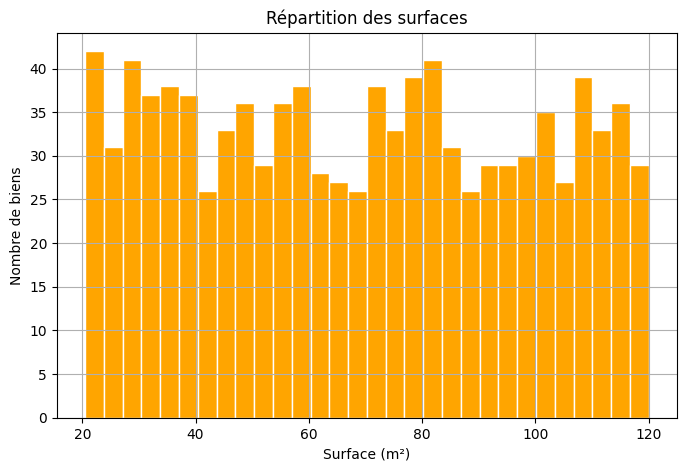

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df['surface_m2'], bins=30, color='orange', edgecolor='w')
plt.title("Répartition des surfaces")
plt.xlabel("Surface (m²)")
plt.ylabel("Nombre de biens")
plt.grid(True)
plt.show()

Après un histogramme qui montre la distribution globale, le boxplot nous donne une synthèse statistique visuelle : médiane, étendue, quartiles, et surtout les valeurs qui sortent du cadre.
Les deux graphiques sont complémentaires, surtout quand on veut repérer rapidement d’éventuelles anomalies.

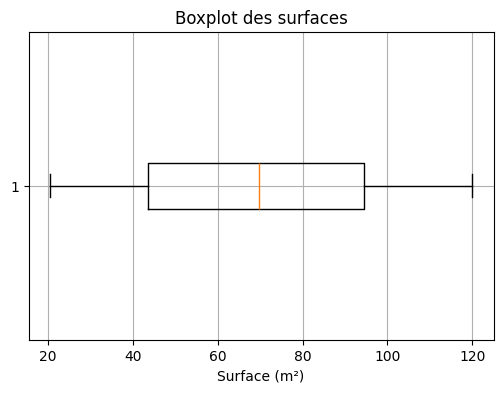

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['surface_m2'], vert=False)
plt.title("Boxplot des surfaces")
plt.xlabel("Surface (m²)")
plt.grid(True)
plt.show()

#### b. Prix des biens immobiliers

Nous visualisons ici la variable `prix_euros` à l’aide d’un histogramme, ce qui permet de comprendre comment les biens sont répartis selon leur prix.

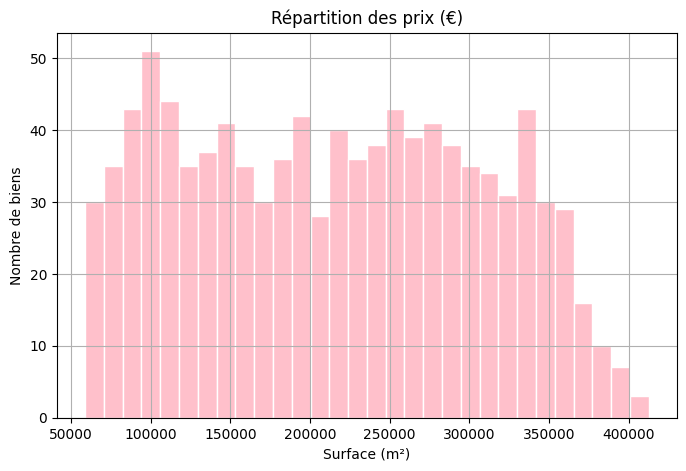

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df['prix_euros'], bins=30, color='pink', edgecolor='w')
plt.title("Répartition des prix (€)")
plt.xlabel("Surface (m²)")
plt.ylabel("Nombre de biens")
plt.grid(True)
plt.show()

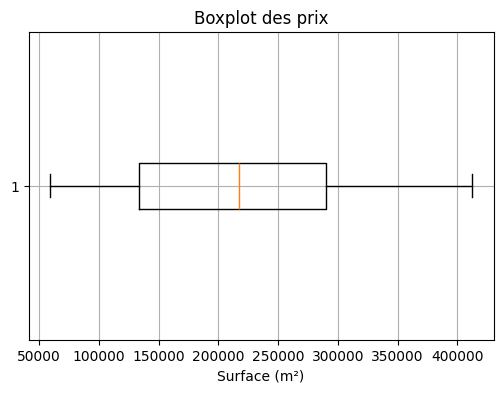

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['prix_euros'], vert=False)
plt.title("Boxplot des prix")
plt.xlabel("Surface (m²)")
plt.grid(True)
plt.show()

#### c. Relation entre la surface et le prix des biens

Un **nuage de points (scatter plot)** permet de visualiser chaque bien comme une paire (surface, prix). Ce type de graphique permet de :
- identifier des tendances générales
- identifier des des groupements de données
- identifier d’éventuelles relations linéaires

Dans notre cas, on observe visuellement qu’une augmentation de la surface semble généralement associée à une augmentation du prix. 

⚠️ Il ne s’agit ici que d'une analyse bivariée visuelle. Ceci constitue une première étape avant d’évaluer plus formellement cette relation à l’aide d’un modèle ou d’un indicateur statistique.

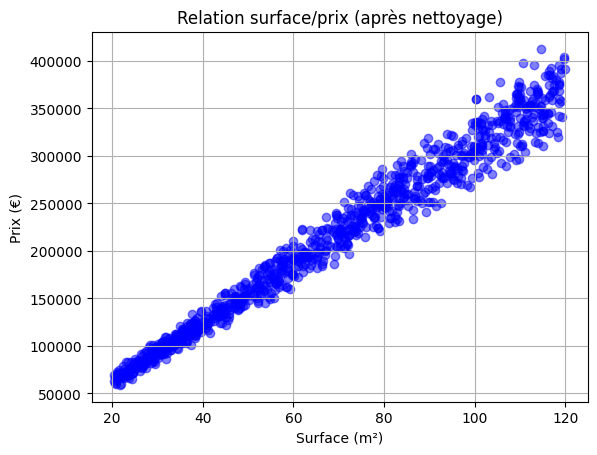

In [11]:
plt.scatter(df['surface_m2'], df['prix_euros'], color='blue', alpha=0.5)
plt.title("Relation surface/prix (après nettoyage)")
plt.xlabel("Surface (m²)")
plt.ylabel("Prix (€)")
plt.grid(True)
plt.show()

#### d. Correlations

Afin d’explorer les **relations linéaires** entre les variables de notre jeu de données, nous calculons la matrice de corrélation de Pearson. Cette méthode permet d’estimer dans quelle mesure deux variables numériques **varient ensemble**.

La matrice ci-dessous met en évidence une corrélation très forte entre la surface en mètres carrés (surface_m2) et le prix en euros (prix_euros).

In [12]:
df.corr()

,surface_m2,prix_euros
surface_m2,1.000000,0.987126
prix_euros,0.987126,1.000000


# 3. Data preparation
___

### Détection des valeurs aberrantes (outliers)

Avant d’entraîner un modèle, il est important d’identifier les **valeurs aberrantes**, c’est-à-dire des données qui sont très éloignées des autres et qui pourraient **fausser les résultats**.

Ici, nous utilisons une méthode simple et classique basée sur l’**écart interquartile (IQR)**.

In [13]:
def detect_outliers(df, column):
    # Calcul du 1er quartile (25 % des valeurs les plus basses)
    Q1 = df[column].quantile(0.25)
    
    # Calcul du 3e quartile (75 % des valeurs les plus basses)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'écart interquartile (zone "normale" des données)
    IQR = Q3 - Q1
    
    # Définition de la borne inférieure (valeurs trop basses)
    lower_bound = Q1 - 1.5 * IQR
    
    # Définition de la borne supérieure (valeurs trop hautes)
    upper_bound = Q3 + 1.5 * IQR
    
    # Retourne un tuple contenant :
    # - la borne inférieure des valeurs acceptables,
    # - la borne supérieure des valeurs acceptables,
    # - les lignes du DataFrame où les valeurs de la colonne spécifiée sont considérées comme des outliers (hors bornes)
    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )

print("Outliers surface :\n", detect_outliers(df, "surface_m2")[2], "\n")
print("Outliers prix :\n", detect_outliers(df, "prix_euros")[2], "\n")

Outliers surface :
 Empty DataFrame
Columns: [surface_m2, prix_euros]
Index: [] 

Outliers prix :
 Empty DataFrame
Columns: [surface_m2, prix_euros]
Index: [] 



In [14]:
# Si nécessaire, exclure les outliers pour des variable spécifiques
# lower_bound, upper_bound, _ = detect_outliers(df, "surface_m2")
#df = df[~((df["surface_m2"] < lower_bound) | (df["surface_m2"] > upper_bound))]

# 4. Train/Test split
___

Avant d’entraîner notre modèle de régression, il est essentiel de séparer nos données en deux ensembles distincts :
- un **ensemble d’entraînement** (**train set**), qui sera utilisé pour **ajuster le modèle**,
- un **ensemble de test** (**test set**), qui servira à **évaluer les performances du modèle sur des données jamais vues**.

Dans notre cas, nous avons choisi une répartition classique de 80 % pour l’entraînement et 20 % pour le test.
Cette séparation permet de vérifier si notre modèle est capable de généraliser à de nouvelles données, et non simplement de mémoriser les exemples qu’il a vus.

In [15]:
# On extrait la variable explicative 'surface_m2' en tant que matrice 2D (nécessaire pour scikit-learn)
X = df[['surface_m2']].values   # shape : (n_samples, 1)

# On extrait la variable cible 'prix_euros' en tant que matrice 2
y = df[['prix_euros']].values   # shape : (n_samples, 1)

# On divise les données en un ensemble d'entraînement (80%) et un ensemble de test (20%)
# random_state=42 permet d'assurer la reproductibilité du découpage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Preprocessing
___

Avant d’entraîner un modèle, il est important de **mettre toutes les variables à la même échelle**.  
La standardisation consiste à transformer les données pour qu’elles aient une moyenne de 0 et un écart-type de 1.

Cela permet au modèle d’apprendre plus efficacement, surtout quand les variables n’ont pas les mêmes unités (par exemple : surface en m², prix en euros).

On utilise ici le `StandardScaler` pour **apprendre la moyenne et l’écart-type** sur les données d’entraînement, puis on applique cette transformation aux données d’entraînement et de test.

In [16]:
scaler_X = StandardScaler() # Initialisation d’un standardiseur pour la variable explicative X
scaler_y = StandardScaler() # Initialisation d’un standardiseur pour la variable cible y

# Apprentissage des paramètres (moyenne, écart-type) sur X_train et transformation des données
X_train_scaled = scaler_X.fit_transform(X_train)

# Apprentissage des paramètres sur y_train et transformation des données
y_train_scaled = scaler_y.fit_transform(y_train)

# Transformation de X_test à l’aide des paramètres appris sur X_train (pas de fit ici)
X_test_scaled = scaler_X.transform(X_test)

# Transformation de y_test à l’aide des paramètres appris sur y_train (pas de fit ici non plus)
y_test_scaled = scaler_y.transform(y_test)

# 6. Model training
___

### a. Apprentissage

Nous allons maintenant **entraîner** notre modèle de régression linéaire **à partir des données d’entraînement** préalablement standardisées.  
Le modèle va apprendre la **relation** entre la surface du bien (`X_train_scaled`) et son prix (`y_train_scaled`) en ajustant une droite qui minimise l’erreur quadratique (**MSE**).

Cette étape est essentielle : c’est ici que le modèle **apprend** à prédire en se basant sur les exemples fournis.

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

### b. Visualisation du modèle entraîné

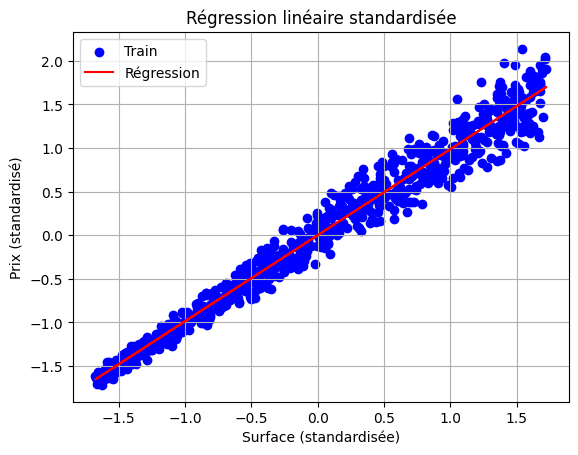

In [18]:
y_train_pred_scaled = model.predict(X_train_scaled)
plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.plot(X_train_scaled, y_train_pred_scaled, color='red', label='Régression')
plt.title("Régression linéaire standardisée")
plt.xlabel("Surface (standardisée)")
plt.ylabel("Prix (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Evaluation
___

Après l’entraînement il est crucial d’évaluer le modèle sur un jeu de données qu’il n’a jamais vu : c’est ce qu’on appelle le **jeu de test**.  
L’objectif est de mesurer sa performance c'est à dire sa **capacité du modèle à généraliser** ses prédictions à de nouvelles données réelles.
On affiche ici :
- la **MSE** (Mean Squared Error) : l’erreur quadratique moyenne entre les prédictions et les vraies valeurs
- la **RMSE** (Root Mean Squared Error) : la racine carrée de la MSE, plus interprétable car dans la même unité que la variable cible
- le **R² score** : appelé aussi **coefficient de détermination**, est un indicateur de performance compris entre 0 et 1, qui mesure la proportion de la variance expliquée par le modèle

### a. Scores

In [19]:
y_pred_scaled = model.predict(X_test_scaled)
mse_train = mean_squared_error(y_test_scaled, y_pred_scaled)
print("MSE :", mse_train)
print("RMSE :", np.sqrt(mse_train))
print("R² :", r2_score(y_test_scaled, y_pred_scaled))

MSE : 0.01995511876823554
RMSE : 0.1412625879992135
R² : 0.9797219792359874


### b. Visualisation des prédictions

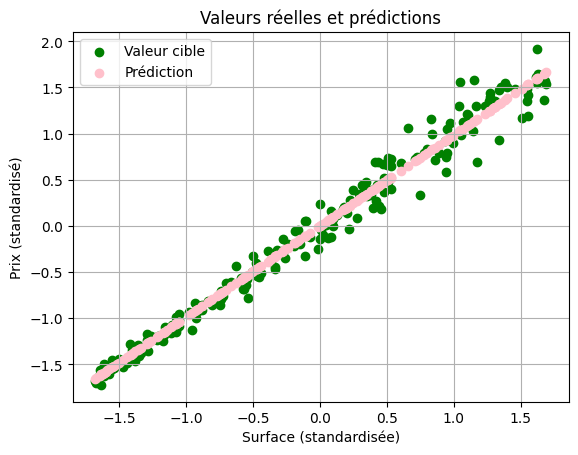

In [20]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Valeurs réelles et prédictions")
plt.xlabel("Surface (standardisée)")
plt.ylabel("Prix (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

# 8. Sauvegarde du modèle et des standardiseurs (scalers)
___

Une fois notre modèle entraîné, il est important de le sauvegarder pour pouvoir le réutiliser plus tard, **sans devoir le réentraîner**.  
Nous sauvegardons également les objets `StandardScaler` utilisés pour la standardisation, ⚠️ **car toute nouvelle donnée devra être transformée avec les mêmes paramètres (moyenne et écart-type) que ceux appris sur les données d’entraînement**.

La sauvegarde se fait ici avec la bibliothèque `joblib`, qui permet de **sérialiser des objets Python** dans des fichiers .pkl.

In [21]:
# Sauvegarde du modèle de régression
joblib.dump(model, "models/model_regression.pkl")

# Sauvegarde du standardiseur des variables explicatives (X)
joblib.dump(scaler_X, "models/scaler_X.pkl")

# Sauvegarde du standardiseur de la variable cible (y), si utilisé (ex : pour une régression)
joblib.dump(scaler_y, "models/scaler_y.pkl")

['models/scaler_y.pkl']

# Comment utiliser le modèle ?
___

In [22]:
# 1. Charger le modèle et les scalers
loaded_model = joblib.load("models/model_regression.pkl")
loaded_scaler_X = joblib.load("models/scaler_X.pkl")
loaded_scaler_y = joblib.load("models/scaler_y.pkl")

# 2. Transformer l’entrée
surface = np.array([[35.5]])  # Attention à la double paire de crochets pour une forme 2D
surface_scaled = loaded_scaler_X.transform(surface)

# 3. Prédiction standardisée
price_scaled = loaded_model.predict(surface_scaled)

# 4. Revenir à l’échelle réelle
real_price = loaded_scaler_y.inverse_transform(price_scaled)

print(f"Le prix prédit pour 35.5 m² est d'environ {real_price[0][0]:,.2f} €")

Le prix prédit pour 35.5 m² est d'environ 111,611.73 €
